In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from warnings import filterwarnings

filterwarnings('ignore')

In [2]:
# Load the data
data = pd.read_csv('../data/nyc_taxi.csv')

In [11]:
data.head()





,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [13]:
# Convert the pickup and dropoff datetime to datetime format

data['timestamp'] = pd.to_datetime(data['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

data.set_index('timestamp', inplace=True)

array([<Axes: xlabel='timestamp'>], dtype=object)

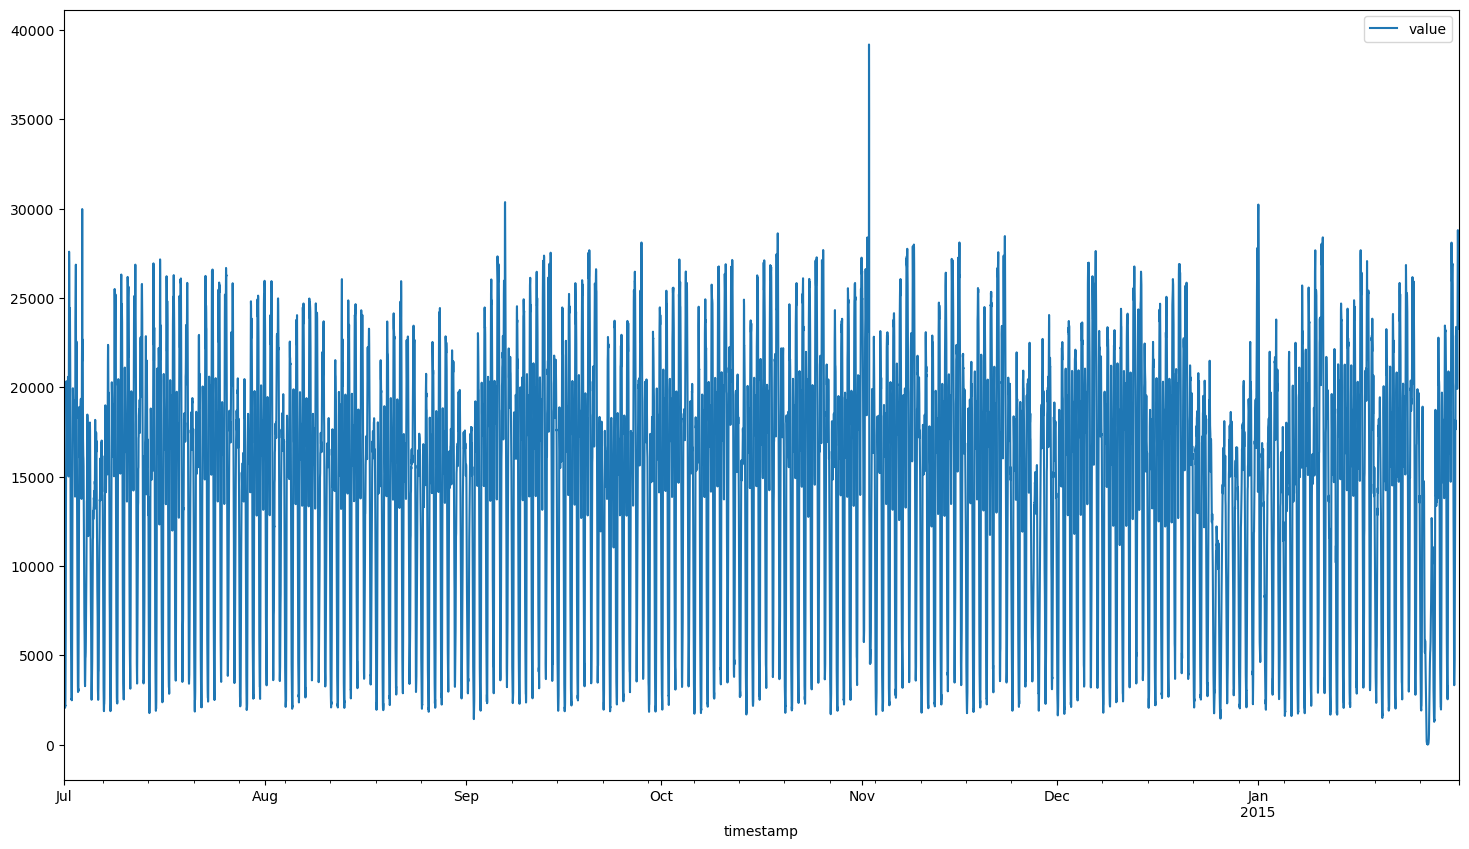

In [18]:
data.plot(subplots=True, figsize=(18, 10))


array([<Axes: xlabel='timestamp'>], dtype=object)

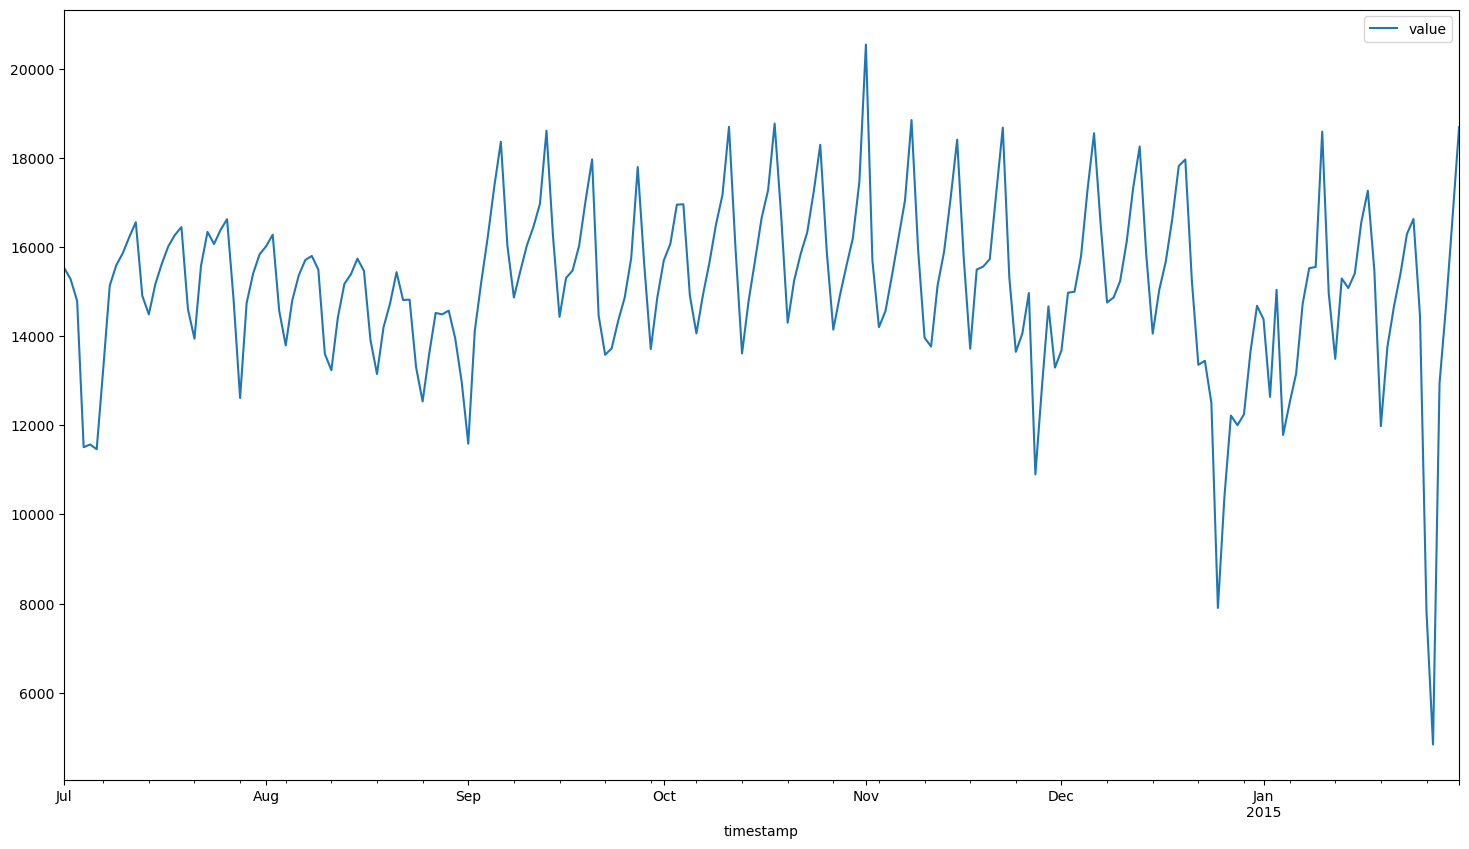

In [22]:
day_period = data.resample('D').mean()

day_period.plot(subplots=True, figsize=(18, 10))

<Axes: xlabel='value', ylabel='Count'>

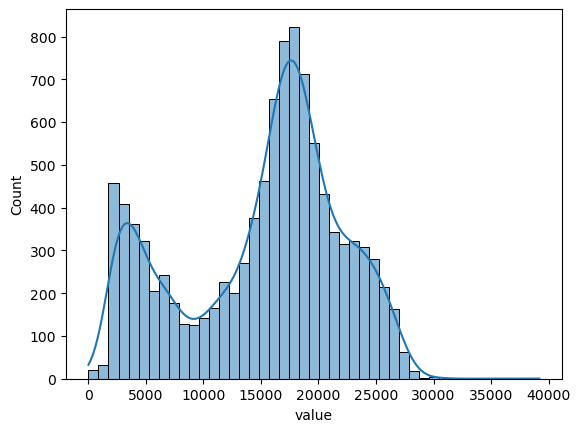

In [24]:
# hist

sns.histplot(data['value'], kde=True)




In [26]:
def detect_outliers(df):
    IQ1 = df['value'].quantile(0.25)
    IQ3 = df['value'].quantile(0.75)
    IQR = IQ3 - IQ1
    lower_bound = IQ1 - 1.5 * IQR
    upper_bound = IQ3 + 1.5 * IQR
    return df[(df['value'] < lower_bound) | (df['value'] > upper_bound)]



In [29]:
outliers = detect_outliers(day_period)

outliers

,value
timestamp,
2014-11-01,20553.500000
2014-11-27,10899.666667
2014-12-25,7902.125000
2014-12-26,10397.958333
2015-01-26,7818.979167
2015-01-27,4834.541667


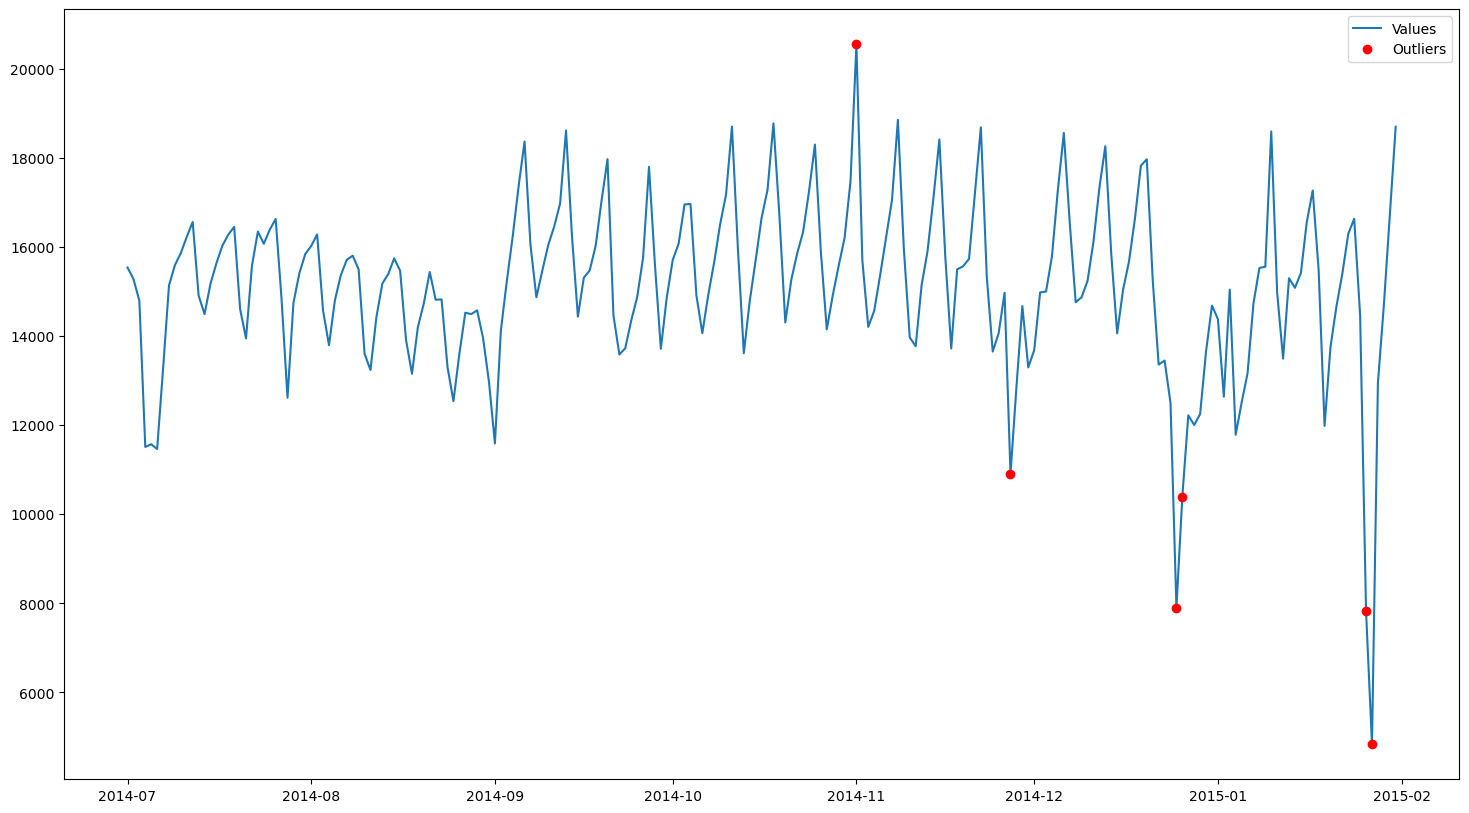

In [48]:
# Plot the outliers
plt.figure(figsize=(18, 10))
plt.plot(day_period.index, day_period['value'], label='Values')
plt.plot(outliers.index, outliers['value'],'ro', label='Outliers') # what is ro? : red circle
plt.legend()


In [49]:
def detect_outliers_z(df,sd=3):
    data_mean, data_std = df['value'].mean(), df['value'].std()
    df['z_score'] = (df['value'] - data_mean) / data_std 
    return df[(df['z_score'] > sd) | (df['z_score'] < -sd)]


In [50]:
outliers_z = detect_outliers_z(day_period)



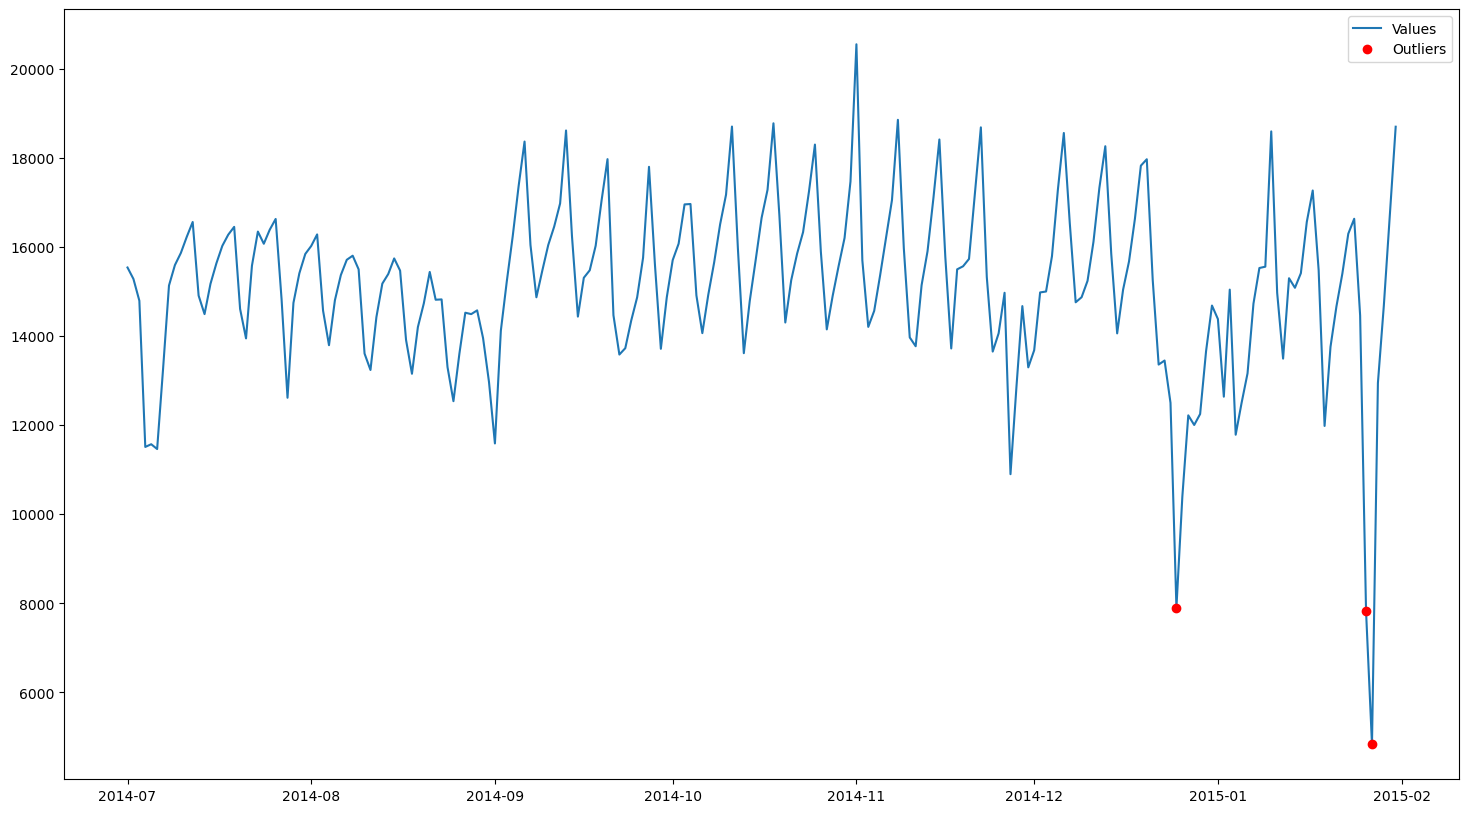

In [51]:
# Plot the outliers
plt.figure(figsize=(18, 10))
plt.plot(day_period.index, day_period['value'], label='Values')
plt.plot(outliers_z.index, outliers_z['value'],'ro', label='Outliers') # what is ro? : red circle
plt.legend()


In [72]:
def detect_outliers_mad(df, threshold=3):
    median = df['value'].median()
    mad = np.abs(df['value'] - median).median()
    value = 0.6745
    df['mad_score'] = np.abs((df['value'] - median) / mad * value)
    
    return df[df['mad_score'] > threshold]



In [73]:
outliers_mad = detect_outliers_mad(day_period)



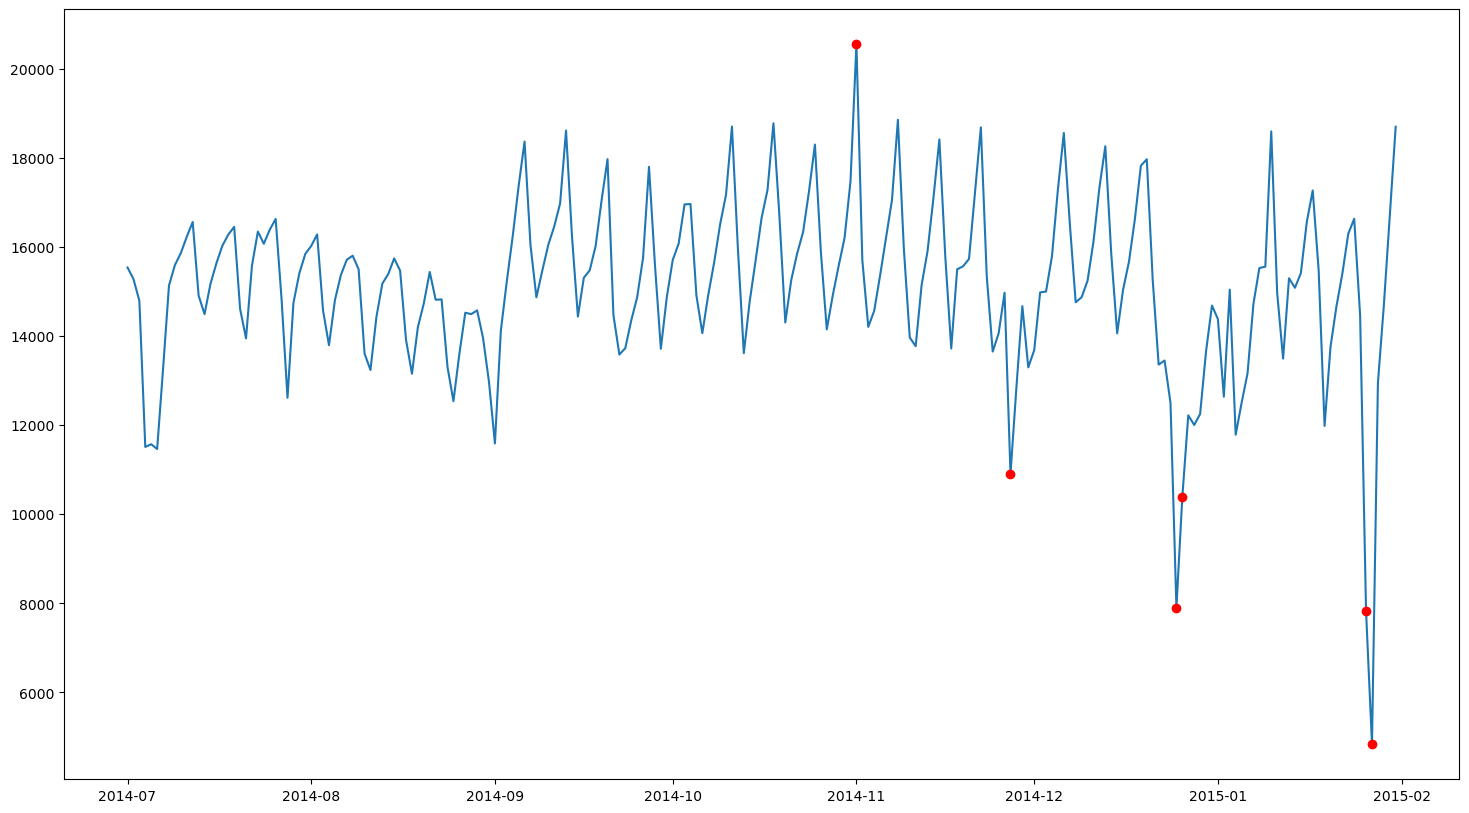

In [74]:
# Plot the outliers
plt.figure(figsize=(18, 10))
plt.plot(day_period.index, day_period['value'], label='Values')
plt.plot(outliers_mad.index, outliers_mad['value'],'ro', label='Outliers') # what is ro? : red circle


In [75]:
# test of normal distribution

from scipy.stats import shapiro

stat, p = shapiro(day_period['value'])

print('Statistics=%.3f, p=%.3f' % (stat, p)) # p-value is less than 0.05, so we reject the null hypothesis that the data is normally distributed



Statistics=0.935, p=0.000
